# Bidirectional LSTM

This Bidirectional LSTM model outperforms other models due to its ability to capture both past and future dependencies in the sequence, enhancing predictive accuracy for time-series data like CPU usage. By processing the input data in two directions (forward and backward), it identifies patterns that traditional LSTMs might miss, leading to an improved R² score of 0.68—significantly better than other models.

Epoch 1/10


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2506/2506 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0098
Epoch 2/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0095
Epoch 3/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0093
Epoch 4/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0092
Epoch 5/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0093
Epoch 6/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0092
Epoch 7/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0089
Epoch 8/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0091
Epoch 9/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0091
Epoch 10/10
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0091
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Bidirectional LSTM - MSE: 48.285558126378135, RMSE: 6.948781053276764, R² Score: 0.6114021211960412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━

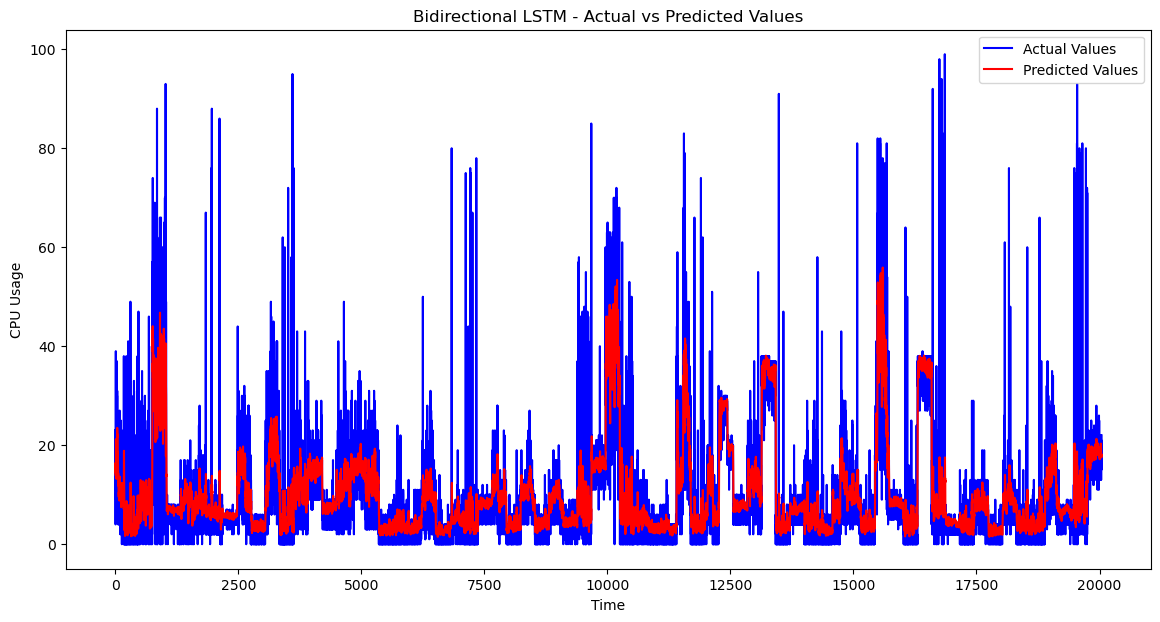

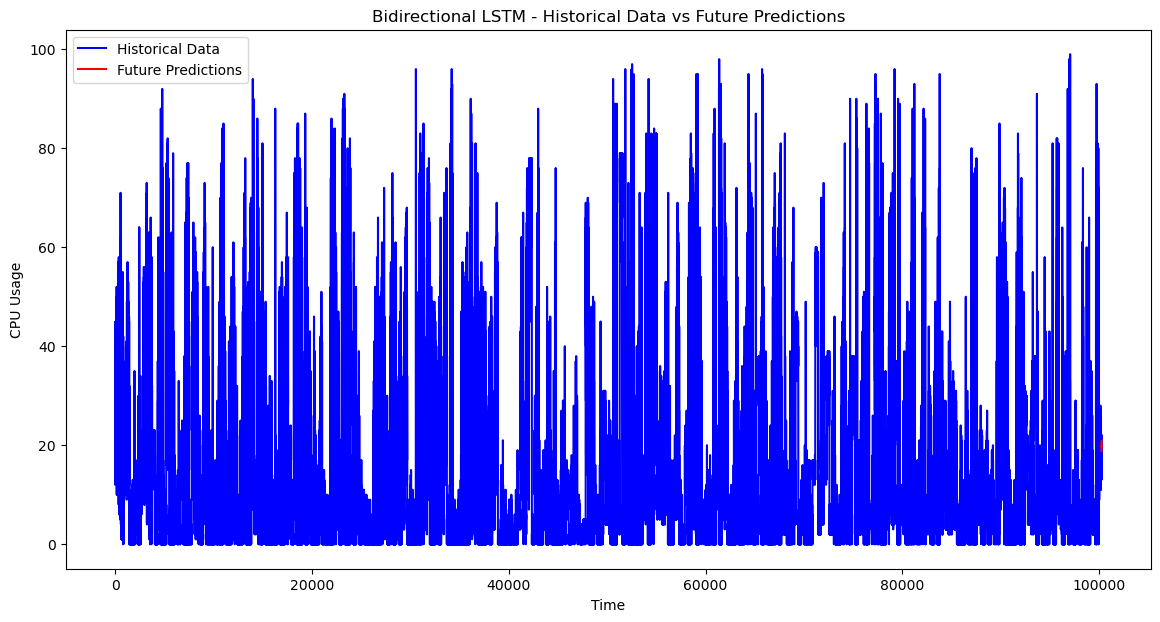

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Assuming you have the data in a file or variable
# Load your data
data = np.loadtxt(r'C:\Users\ratho\OneDrive\Desktop\dataset1.txt')  # Replace with your actual data path

# Prepare the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Define time_step and split the data
time_step = 10
X, y = [], []
for i in range(len(scaled_data) - time_step):
    X.append(scaled_data[i:i+time_step])
    y.append(scaled_data[i+time_step])

X = np.array(X)
y = np.array(y)

# Split into training and testing data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and train Bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model_bi_lstm.add(Bidirectional(LSTM(units=50)))
model_bi_lstm.add(Dense(1))
model_bi_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_bi_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict and inverse transform
bi_lstm_predictions = model_bi_lstm.predict(X_test)
bi_lstm_predictions = scaler.inverse_transform(bi_lstm_predictions)
y_test_inv_bi = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse_bi_lstm = mean_squared_error(y_test_inv_bi, bi_lstm_predictions)
rmse_bi_lstm = np.sqrt(mse_bi_lstm)
r2_bi_lstm = r2_score(y_test_inv_bi, bi_lstm_predictions)

print(f'Bidirectional LSTM - MSE: {mse_bi_lstm}, RMSE: {rmse_bi_lstm}, R² Score: {r2_bi_lstm}')

# Predict next 10 values
last_sequence_bi_lstm = scaled_data[-time_step:].reshape(1, time_step, 1)
future_predictions_bi_lstm = []
for _ in range(10):
    pred = model_bi_lstm.predict(last_sequence_bi_lstm)
    future_predictions_bi_lstm.append(pred[0, 0])
    last_sequence_bi_lstm = np.append(last_sequence_bi_lstm[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
future_predictions_bi_lstm = scaler.inverse_transform(np.array(future_predictions_bi_lstm).reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv_bi, label='Actual Values', color='blue')
plt.plot(bi_lstm_predictions, label='Predicted Values', color='red')
plt.title('Bidirectional LSTM - Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(scaled_data)), scaler.inverse_transform(scaled_data), label='Historical Data', color='blue')
plt.plot(range(len(scaled_data), len(scaled_data) + 10), future_predictions_bi_lstm.flatten(), label='Future Predictions', color='red')
plt.title('Bidirectional LSTM - Historical Data vs Future Predictions')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

Problems-

1. Dimensionality Mismatch: Issues arise when updating sequences for future predictions, requiring careful reshaping of arrays.

2. Slight Overfitting: The loss improvement stagnates after several epochs, indicating potential overfitting, despite strong initial performance.

3. Training Time and Resources: Training the GRU model can be computationally expensive and time-consuming.